In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime

from currency_converter import CurrencyConverter

In [3]:
df = pd.read_csv('data_for_student_case.csv', index_col=0)  # dataframe
df['cvcresponsecode'].apply(lambda x: float(x))
df['amount'].apply(lambda x: float(x))
# df = df[df['simple_journal'] != 'Refused']

txid
1          64800.0
2          44900.0
3         149900.0
4         109900.0
5          89900.0
6          79900.0
7          69900.0
8         129900.0
9         129900.0
10         99900.0
11        129900.0
12         84915.0
13        119900.0
14         99900.0
15        137900.0
16        115300.0
17        102900.0
18        159900.0
19         89165.0
20        119900.0
21        160800.0
22         89900.0
23         97900.0
24        129900.0
25        191900.0
26         93415.0
27        289900.0
28        118900.0
29        329900.0
30        181900.0
            ...   
482699    106250.0
482700    131200.0
482702     98500.0
482703     34900.0
482704     94900.0
482705     64900.0
482707     39900.0
482708     36900.0
482709     45000.0
482711     47400.0
482712     68650.0
482713    108400.0
482714     88900.0
482715     81400.0
482716     77400.0
482717    100000.0
482718     43150.0
482719     84900.0
482720     70000.0
482722    104100.0
482723     48900.0
482724 

In [6]:
df['AUD_currency'] = df[['currencycode', 'amount']].apply(lambda x: CurrencyConverter.convert_currency_from_AUD(x), axis=1)

In [22]:
df['date'] = pd.to_datetime(df['creationdate'])
df.head()

,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,AUD_currency,date
txid,,,,,,,,,,,,,,,,,,
1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798,4471.2,2015-07-01 23:03:11
2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595,3098.1,2015-07-02 04:50:55
3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142,10343.1,2015-07-02 14:30:28
4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744,7583.1,2015-07-03 07:53:37
5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271,6203.1,2015-07-08 18:35:35


In [36]:
df['diff_time'] = df.sort_values(['card_id','creationdate']).groupby(['card_id'])['date'].diff()
df.head(20)

,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,AUD_currency,date,diff_time
txid,,,,,,,,,,,,,,,,,,,
1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798,4471.200,2015-07-01 23:03:11,NaT
2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595,3098.100,2015-07-02 04:50:55,NaT
3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142,10343.100,2015-07-02 14:30:28,NaT
4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744,7583.100,2015-07-03 07:53:37,NaT
5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271,6203.100,2015-07-08 18:35:35,NaT
6,2015-11-09 14:26:25,MX,visaclassic,493161.0,79900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 23:04:26,MexicoAccount,email243511,ip112410,card159816,5513.100,2015-07-08 23:04:26,NaT
7,2015-11-09 14:26:47,MX,visaclassic,477291.0,69900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 02:31:36,MexicoAccount,email137086,ip83481,card251249,4823.100,2015-07-09 02:31:36,NaT
8,2015-11-23 16:34:29,MX,mccredit,520416.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 04:56:48,MexicoAccount,email295644,ip66704,card70297,8963.100,2015-07-09 04:56:48,NaT
9,2015-12-08 19:58:35,MX,visaclassic,477291.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 22:55:40,MexicoAccount,email115605,ip68088,card39791,8963.100,2015-07-09 22:55:40,NaT


In [42]:
time = pd.DatetimeIndex(df['diff_time'])
df['diff_time_min'] = time.hour * 60 + time.minute + 1#df['diff_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df['diff_time_min'] = df['diff_time_min'].fillna(0)
df.sort_values(['card_id', 'date']).head(20)

,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,AUD_currency,date,diff_time,diff_time_min
txid,,,,,,,,,,,,,,,,,,,,
372697,2015-10-09 20:20:25,GB,visadebit,465859.0,4370.0,GBP,GB,Ecommerce,Settled,NaN,1,2015-10-08 00:58:44,UKAccount,email32318,ip45370,card1,7844.150,2015-10-08 00:58:44,NaT,0.0
392860,2015-10-18 23:34:23,GB,mccredit,527669.0,8067.0,GBP,GB,Ecommerce,Settled,True,1,2015-10-16 12:55:18,UKAccount,email282587,ip118422,card10,14480.265,2015-10-16 12:55:18,NaT,0.0
438572,2015-08-22 10:09:07,US,mccredit,534860.0,15000.0,GBP,US,Ecommerce,Refused,True,1,2015-08-22 10:09:07,UKAccount,email1219,ip352402,card100,26925.000,2015-08-22 10:09:07,NaT,0.0
216605,2015-07-10 07:34:43,GB,visadebit,475129.0,7675.0,GBP,GB,Ecommerce,Settled,True,1,2015-07-08 11:13:44,UKAccount,email124883,ip87278,card1000,13776.625,2015-07-08 11:13:44,NaT,0.0
390975,2015-10-16 01:53:07,GB,visadebit,465901.0,8619.0,GBP,GB,Ecommerce,Settled,True,1,2015-10-14 18:33:39,UKAccount,email280659,ip161323,card10000,15471.105,2015-10-14 18:33:39,NaT,0.0
237318,2015-07-21 22:34:59,GB,visadebit,465845.0,5395.0,GBP,GB,Ecommerce,Settled,True,1,2015-07-19 18:20:03,UKAccount,email93952,ip118859,card100001,9684.025,2015-07-19 18:20:03,NaT,0.0
289172,2015-08-20 00:19:22,GB,mccredit,518652.0,5850.0,GBP,GB,Ecommerce,Settled,True,1,2015-08-18 23:18:01,UKAccount,email257278,ip276245,card100002,10500.750,2015-08-18 23:18:01,NaT,0.0
420080,2015-10-28 17:56:56,GB,visadebit,454742.0,4395.0,GBP,GB,Ecommerce,Refused,True,1,2015-10-28 17:56:56,UKAccount,email101827,ip322007,card100003,7889.025,2015-10-28 17:56:56,NaT,0.0
7923,2015-08-15 06:55:06,MX,visaclassic,493160.0,109900.0,MXN,MX,Ecommerce,Refused,True,0,2015-08-15 06:55:05,MexicoAccount,email252242,ip71325,card100004,7583.100,2015-08-15 06:55:05,NaT,0.0


In [72]:
df['day'] = pd.to_datetime(df['creationdate']).dt.date
df.sort_values(['card_id','creationdate']).groupby(['card_id', 'day'])['day'].count()
# df.sort_values(['card_id', 'date']).head(40)

card_id     day       
card1       2015-10-08    1
card10      2015-10-16    1
card100     2015-08-22    1
card1000    2015-07-08    1
card10000   2015-10-14    1
card100001  2015-07-19    1
card100002  2015-08-18    1
card100003  2015-10-28    1
card100004  2015-08-15    1
card100005  2015-09-30    1
card100006  2015-08-28    1
card100007  2015-10-15    3
card100009  2015-09-21    2
card10001   2015-07-09    2
card100010  2015-07-27    1
card100011  2015-08-21    1
card100012  2015-08-16    1
card100013  2015-10-23    1
card100014  2015-10-24    1
card100016  2015-09-03    1
card100017  2015-10-08    1
card100018  2015-10-13    1
card100019  2015-10-20    1
card10002   2015-09-21    1
card100020  2015-07-25    1
card100021  2015-09-23    1
card100022  2015-08-05    1
card100023  2015-07-20    1
card100024  2015-07-11    1
card100025  2015-08-10    1
                         ..
card99970   2015-10-20    1
card99972   2015-08-30    1
card99973   2015-10-25    1
card99974   2015-07-10   

               bookingdate issuercountrycode  txvariantcode       bin  \
txid                                                                    
45081  2015-11-09 15:24:01                AU       mccredit  552033.0   
45082  2015-11-09 15:24:54                AU       mccredit  550201.0   
45083  2015-11-09 15:24:46                AU       mccredit  552033.0   
45084  2015-11-09 15:22:34                AU       mccredit  522980.0   
45085  2015-11-09 15:24:52                AU       mccredit  516310.0   
45086  2015-11-09 15:24:43                AU       mccredit  552350.0   
45087  2015-11-09 15:24:43                AU       mccredit  521729.0   
45088  2015-11-09 15:22:35                AU  visasignature  414726.0   
45089  2015-11-09 15:24:57                AU       mccredit  516361.0   
45090  2015-11-09 15:24:53                AU      visadebit  401795.0   

        amount currencycode shoppercountrycode shopperinteraction  \
txid                                                  

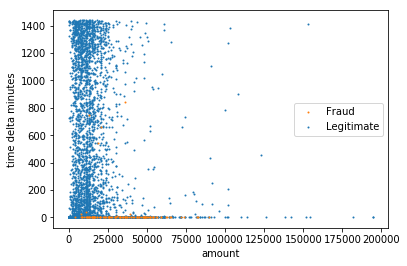

In [55]:
df1 = df[(df['shoppercountrycode'] == 'AU') & (df['currencycode'] == 'AUD')]
print(df1.head(10))
df2 = df1[df1['simple_journal'] == 'Chargeback']
df3 = df1[df1['simple_journal'] == 'Settled']
s = plt.scatter(df3['amount'], df3['diff_time_min'], s=1)
f = plt.scatter(df2['amount'], df2['diff_time_min'], s=1)
plt.legend((f,s),('Fraud','Legitimate'))
plt.xlabel('amount')
plt.ylabel('time delta minutes')

plt.show()

In [18]:
df1 = df.groupby(['shoppercountrycode', 'currencycode']).size().reset_index(name='freq').sort_values(by=['freq'], ascending=False).head()
df2 = df[(df['shoppercountrycode'] == 'AU') & (df['currencycode'] == 'AUD')].groupby(['txvariantcode', 'simple_journal']).size().reset_index(name='freq').sort_values(by=['txvariantcode', 'simple_journal', 'freq'], ascending=False)
df3 = df[df['simple_journal'] == 'Chargeback'].groupby(['shoppercountrycode', 'currencycode']).size().reset_index(name='freq').sort_values(by=['freq'], ascending=False)

# print(df1)
print(df2.head())

     txvariantcode simple_journal  freq
20   visasignature        Settled   123
19   visasignature     Chargeback     5
18  visapurchasing        Settled    13
17  visapurchasing     Chargeback     2
16    visaplatinum        Settled  1820
